In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/crimeclassification/

#!unzip -qq "/content/drive/MyDrive/ColabNotebooks/crimeclassification/open.zip"


/content/drive/MyDrive/ColabNotebooks/crimeclassification


In [ ]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
train.head(5)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


In [ ]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']

x_test = test.drop('ID', axis = 1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [ ]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    # x_train데이터에서 존재하지 않았던 값이 x_test 데이터에 존재할 수도 있습니다.
    # 따라서 x_test 데이터를 바로 변형시키지 않고 고윳값을 확인후 x_test 데이터를 변환합니다.
    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
target= train['TARGET'].value_counts().reset_index() #타겟변수의 데이터 확인
target

,index,TARGET
0,0,36453
1,1,25397
2,2,22556


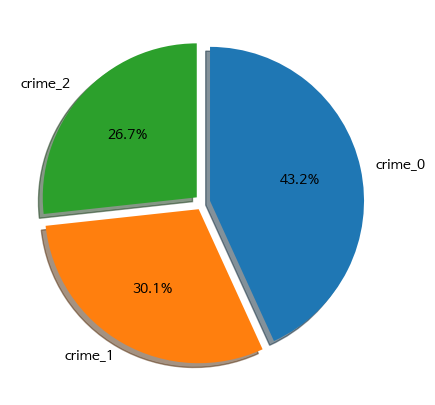

In [ ]:
explode = [0.05] * 3
labels = ['crime_0', 'crime_1', 'crime_2']

plt.figure(figsize = (10, 5))
plt.pie(target['TARGET'], labels = labels, autopct = '%.1f%%', startangle = 90, counterclock = False,shadow = True,  explode = explode)
plt.show()

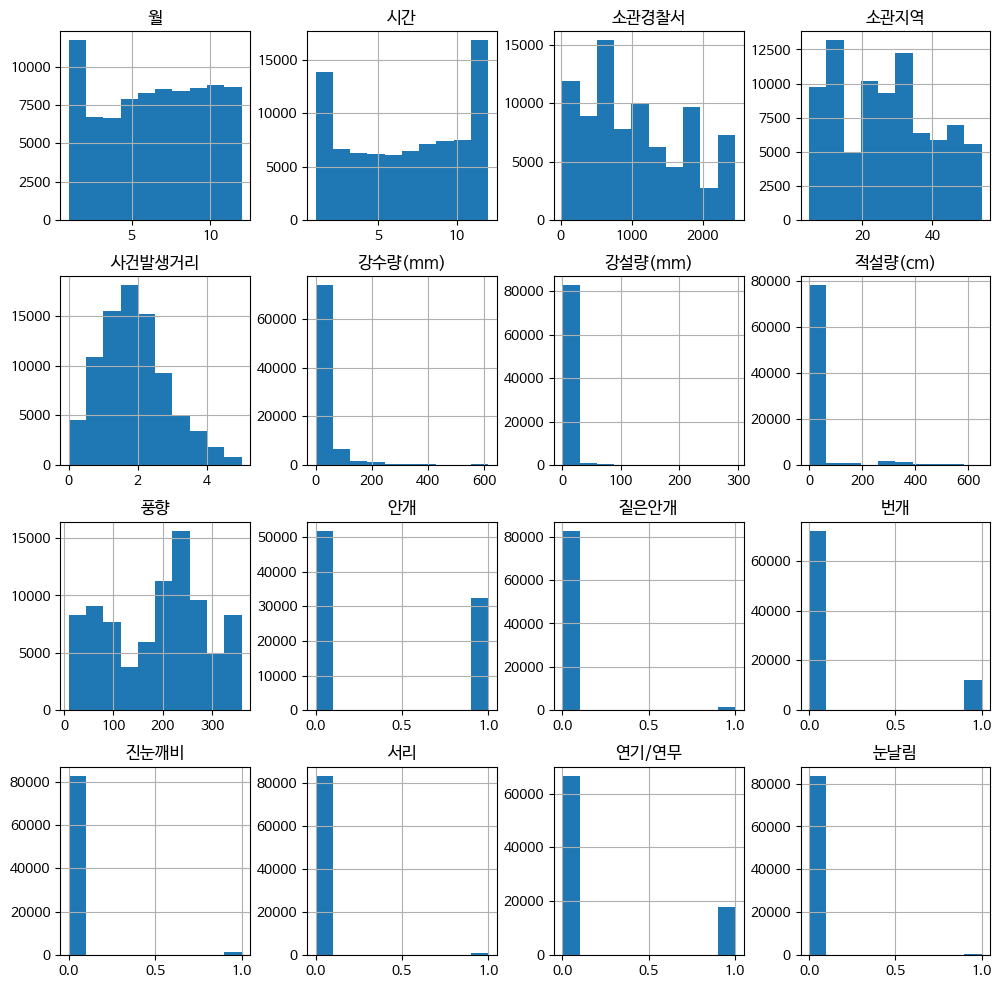

In [ ]:
#전체 데이터 분포 확인
except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.show()

<ipython-input-16-3baf479c0bf1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


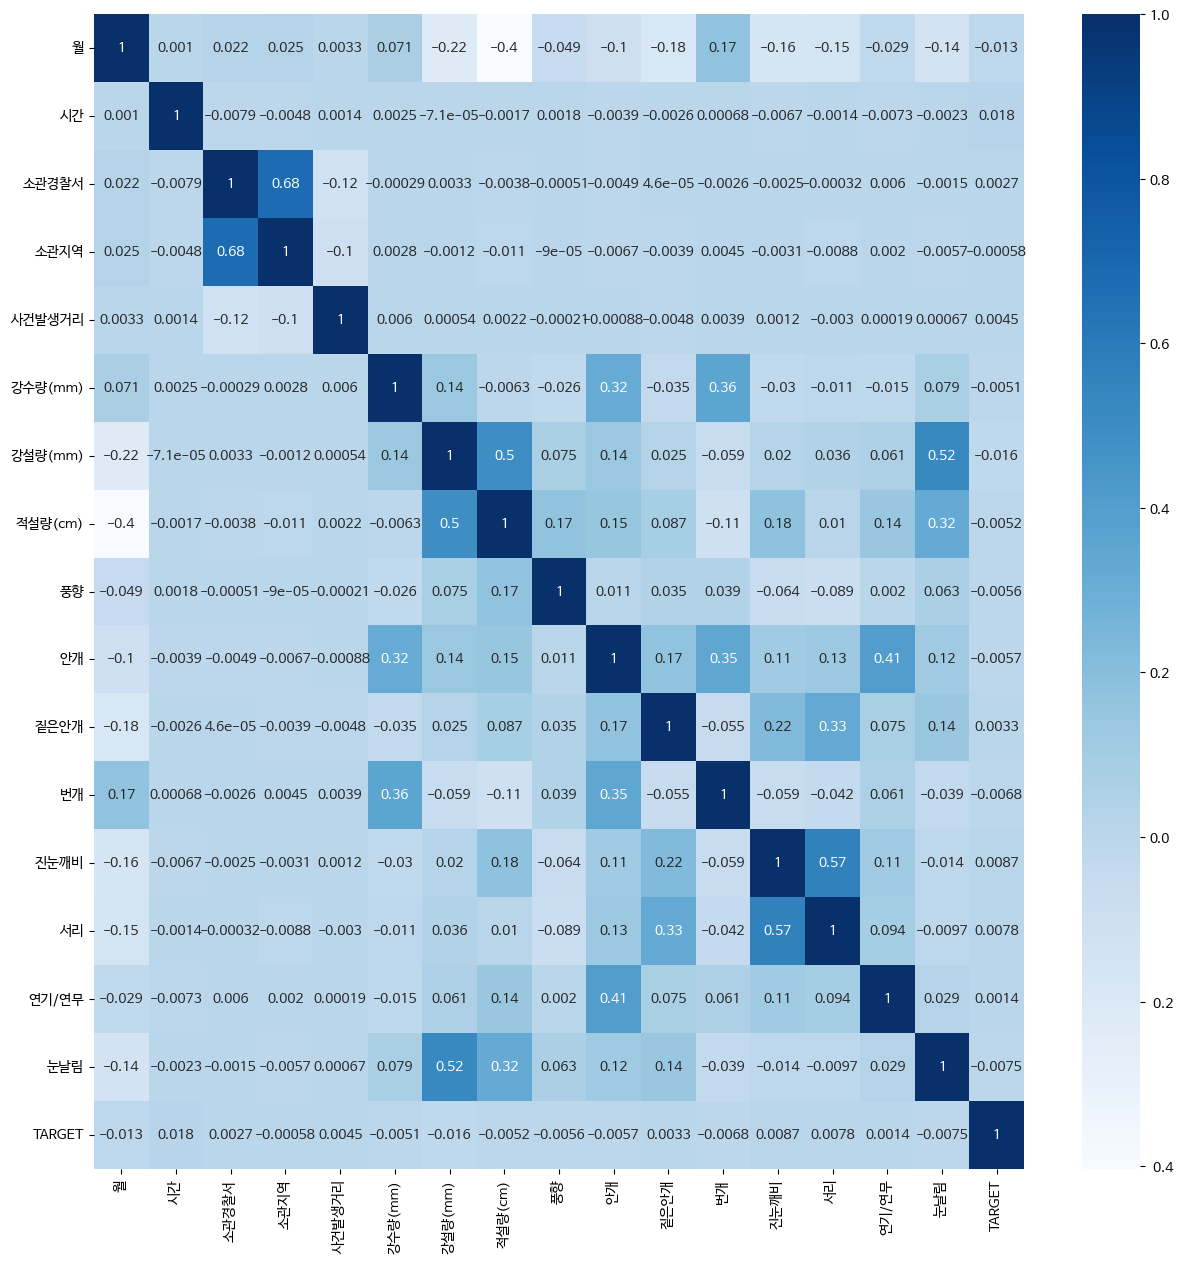

In [ ]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

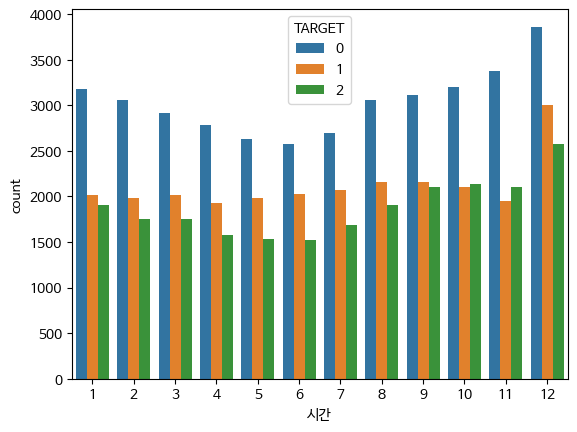

In [ ]:
#시간대별 발생 범죄 빈도 확인
sns.countplot(x='시간', hue = 'TARGET', data=train)
plt.show()

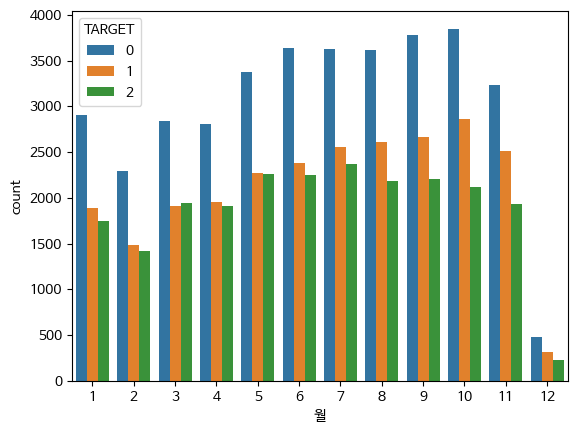

In [ ]:
#월별 발생 범죄 빈도 확인
sns.countplot(x='월', hue = 'TARGET', data=train)
plt.show()

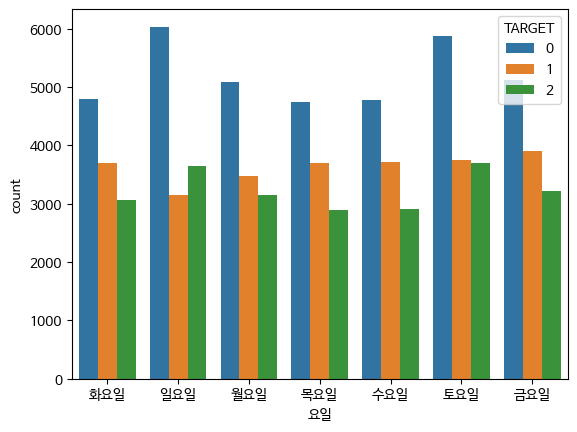

In [ ]:
#요일별 발생 범죄 빈도 확인
sns.countplot(x='요일', hue = 'TARGET', data=train)
plt.show()

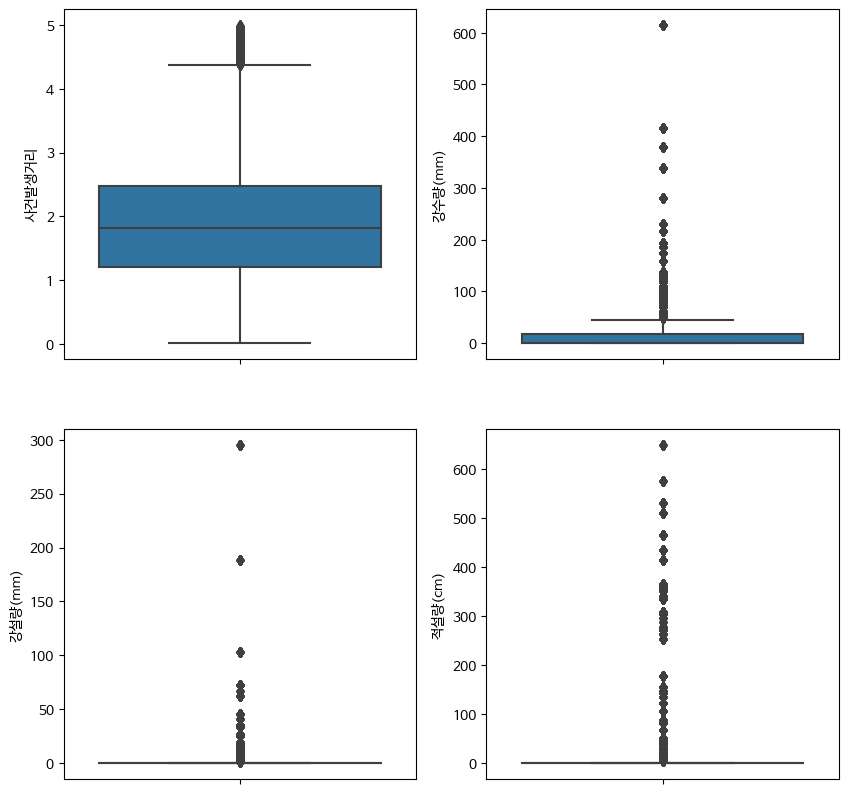

In [ ]:
#이상치 확인
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train['적설량(cm)'], ax = axes[1][1])

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2 , stratify = y_train)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=63d0c8bf03de344eefaa068f3b0f9a2ed49f16c933f967e3f3357f2d408d8c59
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [ ]:
# Import libraries
import h2o
from h2o.automl import H2OAutoML, get_leaderboard

import pandas as pd
import json

from sklearn.metrics import f1_score, accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Start the H2O cluster (locally)
h2o.init()

In [ ]:
# Import data directly as H2O frame
main_frame = h2o.import_file(path='/content/drive/MyDrive/ColabNotebooks/crimeclassification/train.csv')
test_frame = h2o.import_file(path='/content/drive/MyDrive/ColabNotebooks/crimeclassification/test.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target = 'TARGET'
predictors = [n for n in main_frame.col_names if n != target]
# Factorize target variable so that autoML tackles classification problem (instead of regression)
main_frame[target] = main_frame[target].asfactor()

# Visualize H2O frame structure
main_frame.head()

ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
TRAIN_00000,9,화요일,10,137,8,2.61112,0,0,0,245,0,0,0,0,0,0,0,차도,2
TRAIN_00001,11,화요일,6,438,13,3.20909,0,0,0,200,0,0,0,0,0,0,0,차도,0
TRAIN_00002,8,일요일,6,1729,47,1.6196,0,0,0,40,1,0,0,0,0,1,0,인도,1
TRAIN_00003,5,월요일,6,2337,53,1.92161,11.375,0,0,225,1,1,0,0,0,0,0,주거지,1
TRAIN_00004,9,일요일,11,1439,41,1.78972,0,0,0,255,0,0,0,0,0,0,0,주유소,2
TRAIN_00005,5,화요일,8,447,13,2.03749,4.125,0,0,165,0,0,0,0,0,0,0,주거지,0
TRAIN_00006,8,목요일,8,1846,36,2.32195,3.25,0,0,120,1,0,1,0,0,1,0,차도,1
TRAIN_00007,6,수요일,11,1527,45,3.56857,1,0,0,200,0,0,0,0,0,0,0,주거지,0
TRAIN_00008,9,수요일,2,1526,45,3.80574,0,0,0,65,0,0,0,0,0,0,0,주거지,2
TRAIN_00009,7,월요일,2,1747,46,1.45344,0,0,0,85,0,0,0,0,0,0,0,차도,2


In [ ]:
!mkdir -p artifacts/model

aml = H2OAutoML(
                max_models=15, # Run AutoML for n base models
                seed=42, 
                balance_classes=True, # Our target classes are imbalanced, so we set this to True
                sort_metric='logloss', # Sort models by logloss (main metric for multi-classification)
                verbosity='info', # Turn on verbose info
                exclude_algos = ['GLM', 'DRF'], #['GLM', 'DRF'], # Specify which algorithms to exclude
               )

aml.train(x=predictors, y=target, training_frame=main_frame)

# Print and view AutoML Leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')
print(lb.head(rows=lb.nrows))

# Save leaderboard as CSV
lb_path = f'artifacts/model/leaderboard.csv'
lb.as_data_frame().to_csv(lb_path, index=False) 
print(f'Leaderboard saved in {lb_path}')

AutoML progress: |
20:04:08.976: Project: AutoML_1_20230528_200408
20:04:08.981: 5-fold cross-validation will be used.
20:04:09.0: Setting stopping tolerance adaptively based on the training frame: 0.003442019609613313
20:04:09.0: Build control seed: 42
20:04:09.2: training frame: Frame key: AutoML_1_20230528_200408_training_py_1_sid_847e    cols: 20    rows: 84406  chunks: 8    size: 3368188  checksum: 7057331708744355072
20:04:09.2: validation frame: NULL
20:04:09.2: leaderboard frame: NULL
20:04:09.2: blending frame: NULL
20:04:09.2: response column: TARGET
20:04:09.2: fold column: null
20:04:09.3: weights column: null
20:04:09.82: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_

In [ ]:
# Display learning curve
learning_curve_plot = aml.leader.learning_curve_plot()